In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## reading excel file
df=pd.read_excel("data.xlsx")

In [3]:
df.head()

,PERIOD,SUPER CATEGORY,PRODUCT GROUP,ADVERTISER,PRODUCT,PUBLICATION,AD TYPE(CLR/BW),VOL_SQCM
0,Apr - 2018,Agriculture,Agri-corporate,Veg&Fruit Prom Council Kerala,Vegetable&Fruit Promo Coun (Kerala),PLAYER 2,Color,48
1,Apr - 2018,Alcoholic Drinks,Liquor,United Spirits Ltd,Mcdowells No1 Mineral Water,PLAYER 1,Black & White,32
2,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 2,Color,4021
3,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 1,Color,2612
4,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Freestyle,PLAYER 2,Color,6953


In [4]:
df.rename(columns={'PERIOD': 'period', 'SUPER CATEGORY': 'super_category','PRODUCT GROUP':'product_group','ADVERTISER':'advertiser','PRODUCT':'product','PUBLICATION':'publication','AD TYPE(CLR/BW)':'ad_type','VOL_SQCM':'vol_sqcm'},inplace=True)

In [5]:
df.head()

,period,super_category,product_group,advertiser,product,publication,ad_type,vol_sqcm
0,Apr - 2018,Agriculture,Agri-corporate,Veg&Fruit Prom Council Kerala,Vegetable&Fruit Promo Coun (Kerala),PLAYER 2,Color,48
1,Apr - 2018,Alcoholic Drinks,Liquor,United Spirits Ltd,Mcdowells No1 Mineral Water,PLAYER 1,Black & White,32
2,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 2,Color,4021
3,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 1,Color,2612
4,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Freestyle,PLAYER 2,Color,6953


In [6]:
df.shape

(70837, 8)

In [7]:
df.columns

Index(['period', 'super_category', 'product_group', 'advertiser', 'product',
       'publication', 'ad_type', 'vol_sqcm'],
      dtype='object')

In [8]:
df.nunique()

period               32
super_category       27
product_group       504
advertiser        16599
product           22360
publication           2
ad_type               2
vol_sqcm           5682
dtype: int64

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(70837, 8)

In [11]:
df.head()

,period,super_category,product_group,advertiser,product,publication,ad_type,vol_sqcm
0,Apr - 2018,Agriculture,Agri-corporate,Veg&Fruit Prom Council Kerala,Vegetable&Fruit Promo Coun (Kerala),PLAYER 2,Color,48
1,Apr - 2018,Alcoholic Drinks,Liquor,United Spirits Ltd,Mcdowells No1 Mineral Water,PLAYER 1,Black & White,32
2,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 2,Color,4021
3,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 1,Color,2612
4,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Freestyle,PLAYER 2,Color,6953


In [12]:
df.publication.value_counts()

PLAYER 2    44681
PLAYER 1    26156
Name: publication, dtype: int64

In [13]:
df.product_group.value_counts()

Ret Auto-cars                     5827
Educ-multiple Courses             4375
Hospital/clinics                  4257
Educ-coaching Centre/comp Exam    3908
Educ-vocational Training Inst     3163
                                  ... 
Ret Sports Goods/accessories         1
Cold Creams                          1
Wearable Devices                     1
Hair Wash Powder                     1
Ret Software                         1
Name: product_group, Length: 504, dtype: int64

In [14]:
# df1 = df.groupby(['publication','period']).size().unstack()
# df1.columns = df.columns.droplevel()
# df1.plot(kind='barh')

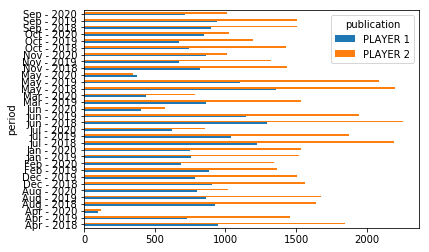

In [15]:
df.groupby('period').publication.value_counts().unstack().plot.barh()

In [16]:
df['year'] = pd.DatetimeIndex(df['period']).year

In [17]:
df.head()

,period,super_category,product_group,advertiser,product,publication,ad_type,vol_sqcm,year
0,Apr - 2018,Agriculture,Agri-corporate,Veg&Fruit Prom Council Kerala,Vegetable&Fruit Promo Coun (Kerala),PLAYER 2,Color,48,2018
1,Apr - 2018,Alcoholic Drinks,Liquor,United Spirits Ltd,Mcdowells No1 Mineral Water,PLAYER 1,Black & White,32,2018
2,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 2,Color,4021,2018
3,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 1,Color,2612,2018
4,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Freestyle,PLAYER 2,Color,6953,2018


### Q.1) If the market has only two media players i.e. PLAYER 1 & PLAYER 2 - do you observe any uptrend/ downtrend in the overall Advt. flow year-on year? Support your observations with data points.

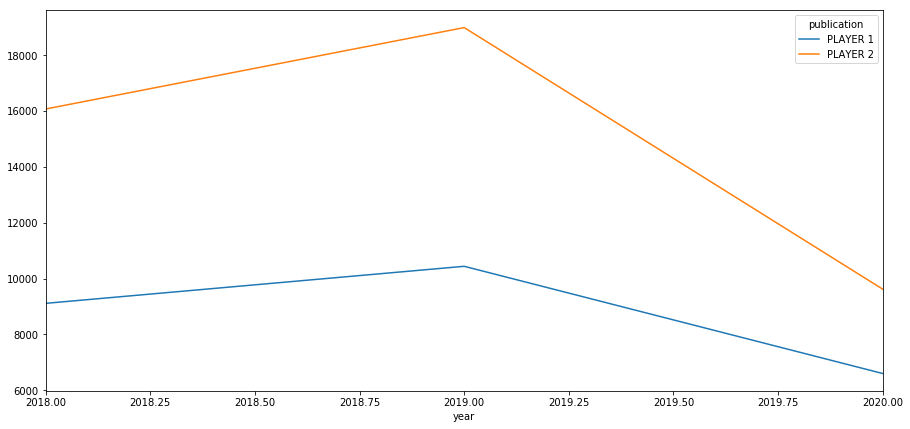

In [18]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['year','publication']).count()['advertiser'].unstack().plot(ax=ax)

### Q.2.) What are the highlights in the performance of Each Player? Identify 5 Super Categories & Advertisers where Each Player is strong. Support your answers with data findings.

In [19]:
## super category
count_df=df.groupby(["publication",'super_category'])["super_category"].count().reset_index(name="count")

In [20]:
count_df

,publication,super_category,count
0,PLAYER 1,Agriculture,13
1,PLAYER 1,Alcoholic Drinks,2
2,PLAYER 1,Auto,3889
3,PLAYER 1,Babycare,4
4,PLAYER 1,Banking/Finance/Investment,1222
5,PLAYER 1,"Building, Industrial & Land Materials/Equipments",352
6,PLAYER 1,Computers,52
7,PLAYER 1,Corporate/Brand Image,257
8,PLAYER 1,Durables,439
9,PLAYER 1,Education,7620


In [21]:
count_df.shape

(53, 3)

In [22]:
## sorted in descending order
count_df_sort=count_df.groupby('publication').apply(lambda x: x.sort_values('count',ascending=False))

In [23]:
count_df_sort

publication                                    super_category  \
publication                                                                    
PLAYER 1    9     PLAYER 1                                         Education   
            22    PLAYER 1                                          Services   
            2     PLAYER 1                                              Auto   
            16    PLAYER 1                                     Miscellaneous   
            21    PLAYER 1                                            Retail   
            4     PLAYER 1                        Banking/Finance/Investment   
            18    PLAYER 1                              Personal Accessories   
            8     PLAYER 1                                          Durables   
            5     PLAYER 1  Building, Industrial & Land Materials/Equipments   
            25    PLAYER 1                                 Textiles/Clothing   
            20    PLAYER 1                               Personal Healthcare   
            7     PLAYER 1                             Corporate/Brand Image   
            10    PLAYER 1                                  Food & Beverages   
            19    PLAYER 1                    Personal Care/Personal Hygiene   
            13    PLAYER 1                                Household Products   
            12    PLAYER 1                                         Hair Care   
            15    PLAYER 1                                             Media   
            6     PLAYER 1                                         Computers   
            23    PLAYER 1                                  Telecom Products   
            11    PLAYER 1                           Fuel/Petroleum Products   
            14    PLAYER 1                                           Laundry   
            17    PLAYER 1                                 Office Automation   
            24    PLAYER 1                Telecom/Internet Service Providers   
            0     PLAYER 1                                       Agriculture   
            26    PLAYER 1                        Tobacco & Related Products   
            3     PLAYER 1                                          Babycare   
            1     PLAYER 1                                  Alcoholic Drinks   
PLAYER 2    36    PLAYER 2                                         Education   
            49    PLAYER 2                                          Services   
            29    PLAYER 2                                              Auto   
            48    PLAYER 2                                            Retail   
            43    PLAYER 2                                     Miscellaneous   
            31    PLAYER 2                        Banking/Finance/Investment   
            45    PLAYER 2                              Personal Accessories   
            35    PLAYER 2                                          Durables   
            32    PLAYER 2  Building, Industrial & Land Materials/Equipments   
            52    PLAYER 2                                 Textiles/Clothing   
            34    PLAYER 2                             Corporate/Brand Image   
            37    PLAYER 2                                  Food & Beverages   
            40    PLAYER 2                                Household Products   
            47    PLAYER 2                               Personal Healthcare   
            46    PLAYER 2                    Personal Care/Personal Hygiene   
            33    PLAYER 2                                         Computers   
            42    PLAYER 2                                             Media   
            39    PLAYER 2                                         Hair Care   
            50    PLAYER 2                                  Telecom Products   
            38    PLAYER 2                           Fuel/Petroleum Products   
            44    PLAYER 2                                 Office Automation   
            41 

In [24]:
##advertiser
count_df_ad=df.groupby(["publication",'advertiser'])["advertiser"].count().reset_index(name="count")

In [25]:
count_df_ad

,publication,advertiser,count
0,PLAYER 1,1 To 1 Home Tutors,1
1,PLAYER 1,18 Am Padi Construction,1
2,PLAYER 1,24 Mantra Organic,1
3,PLAYER 1,2d Entertainment,1
4,PLAYER 1,3-Son Motor Driving Sch,1
...,...,...,...
21733,PLAYER 2,Zorah Silks (Knr),1
21734,PLAYER 2,Zorrah,7
21735,PLAYER 2,Zukni (Pkd),2
21736,PLAYER 2,Zyra Design & Fabric Studio,3


In [26]:
## sorted in descending order to get top 5
count_df_ad_desc=count_df_ad.groupby('publication').apply(lambda x: x.sort_values('count',ascending=False))

In [27]:
## sorted in ascending order to get top 5 of player 2
count_df_ad_asc=count_df_ad.groupby('publication').apply(lambda x: x.sort_values('count'))

In [28]:
count_df_ad_asc

publication                     advertiser  count
publication                                                        
PLAYER 1    0        PLAYER 1             1 To 1 Home Tutors      1
            4665     PLAYER 1        Nanda Enterprises (Alp)      1
            4663     PLAYER 1                Nancy Forex Ltd      1
            4661     PLAYER 1       Namindex Derivatives Llp      1
            4658     PLAYER 1               Nambiar Builders      1
...                       ...                            ...    ...
PLAYER 2    12757    PLAYER 2        Hyundai Motor India Ltd    151
            20807    PLAYER 2  Tv Sundram Iyengar & Sons Ltd    180
            15328    PLAYER 2        Maruti Suzuki India Ltd    194
            13038    PLAYER 2            Indus Motor Pvt Ltd    206
            18515    PLAYER 2              Sarathy Auto Cars    245

[21738 rows x 3 columns]

### Q.3) After examining the performance of both Players in FY 2020-21, what would be your recommendations to Each Player to achieve growth going forward? Establish your arguments with data points.


In [29]:
## advertiser
year_df=df.groupby(["publication",'year','advertiser'])["advertiser"].count().reset_index(name="count")

In [30]:
## for the year 2020-21
year_df=year_df.loc[year_df['year'] ==2020]

In [31]:
## sorting
year_df_asc=year_df.groupby('publication').apply(lambda x: x.sort_values('count',ascending=False))
year_df_asc

publication  year                      advertiser  count
publication                                                               
PLAYER 1    10927    PLAYER 1  2020               Sarathy Auto Cars     66
            10136    PLAYER 1  2020         Maruti Suzuki India Ltd     48
            9522     PLAYER 1  2020             Indus Motor Pvt Ltd     38
            9019     PLAYER 1  2020         Dept Of Lotteries (Ker)     38
            9453     PLAYER 1  2020         Hyundai Motor India Ltd     37
...                       ...   ...                             ...    ...
PLAYER 2    28323    PLAYER 2  2020                  K P Namboodiri      1
            28324    PLAYER 2  2020                    K P Sanitary      1
            28325    PLAYER 2  2020  K Pandyarajah Bal Charit Trust      1
            28326    PLAYER 2  2020                     K R Apparel      1
            31283    PLAYER 2  2020                          Zorrah      1

[8255 rows x 4 columns]

In [32]:
## sorting in ascending
year_df_asc=year_df.groupby('publication').apply(lambda x: x.sort_values('count'))
year_df_asc

publication  year                           advertiser  \
publication                                                                
PLAYER 1    8363     PLAYER 1  2020              18 Am Padi Construction   
            10387    PLAYER 1  2020  Nest Inst Of Humanities & Basic Sci   
            10388    PLAYER 1  2020           Net Fab Interior&Exteriors   
            10389    PLAYER 1  2020  Nethaji Memorial Arts & Science Clg   
            10393    PLAYER 1  2020                    New Cochin Bakery   
...                       ...   ...                                  ...   
PLAYER 2    27341    PLAYER 2  2020              Dept Of Lotteries (Ker)   
            30736    PLAYER 2  2020                      Tata Motors Ltd   
            28096    PLAYER 2  2020                  Indus Motor Pvt Ltd   
            28971    PLAYER 2  2020              Maruti Suzuki India Ltd   
            30124    PLAYER 2  2020                    Sarathy Auto Cars   

                   count  
publication               
PLAYER 1    8363       1  
            10387      1  
            10388      1  
            10389      1  
            10393      1  
...                  ...  
PLAYER 2    27341     37  
            30736     40  
            28096     46  
            28971     53  
            30124     74  

[8255 rows x 4 columns]

In [33]:
year_df.year.value_counts()

2020    8255
Name: year, dtype: int64

In [34]:
## super category
year_df_cat=df.groupby(["publication",'year','super_category'])["super_category"].count().reset_index(name="count")

In [35]:
year_df_cat=year_df_cat.loc[year_df_cat['year'] ==2020]

In [36]:
year_df_cat

,publication,year,super_category,count
53,PLAYER 1,2020,Agriculture,7
54,PLAYER 1,2020,Auto,1038
55,PLAYER 1,2020,Banking/Finance/Investment,465
56,PLAYER 1,2020,"Building, Industrial & Land Materials/Equipments",103
57,PLAYER 1,2020,Computers,12
58,PLAYER 1,2020,Corporate/Brand Image,88
59,PLAYER 1,2020,Durables,79
60,PLAYER 1,2020,Education,1732
61,PLAYER 1,2020,Food & Beverages,89
62,PLAYER 1,2020,Fuel/Petroleum Products,9


In [37]:
## sorting in ascending order
year_df_cat_sort=year_df_cat.groupby('publication').apply(lambda x: x.sort_values('count'))

In [38]:
year_df_cat_sort

publication  year  \
publication                         
PLAYER 1    77     PLAYER 1  2020   
            74     PLAYER 1  2020   
            68     PLAYER 1  2020   
            75     PLAYER 1  2020   
            63     PLAYER 1  2020   
            53     PLAYER 1  2020   
            62     PLAYER 1  2020   
            57     PLAYER 1  2020   
            65     PLAYER 1  2020   
            66     PLAYER 1  2020   
            70     PLAYER 1  2020   
            64     PLAYER 1  2020   
            76     PLAYER 1  2020   
            71     PLAYER 1  2020   
            59     PLAYER 1  2020   
            58     PLAYER 1  2020   
            61     PLAYER 1  2020   
            56     PLAYER 1  2020   
            69     PLAYER 1  2020   
            55     PLAYER 1  2020   
            72     PLAYER 1  2020   
            67     PLAYER 1  2020   
            73     PLAYER 1  2020   
            54     PLAYER 1  2020   
            60     PLAYER 1  2020   
PLAYER 2    153    PLAYER 2  2020   
            132    PLAYER 2  2020   
            141    PLAYER 2  2020   
            146    PLAYER 2  2020   
            130    PLAYER 2  2020   
            152    PLAYER 2  2020   
            140    PLAYER 2  2020   
            143    PLAYER 2  2020   
            135    PLAYER 2  2020   
            144    PLAYER 2  2020   
            148    PLAYER 2  2020   
            149    PLAYER 2  2020   
            142    PLAYER 2  2020   
            154    PLAYER 2  2020   
            139    PLAYER 2  2020   
            136    PLAYER 2  2020   
            137    PLAYER 2  2020   
            134    PLAYER 2  2020   
            147    PLAYER 2  2020   
            133    PLAYER 2  2020   
            150    PLAYER 2  2020   
            145    PLAYER 2  2020   
            131    PLAYER 2  2020   
            151    PLAYER 2  2020   
            138    PLAYER 2  2020   

                                                   super_category  count  
publication                                                               
PLAYER 1    77                         Tobacco & Related Products      3  
            74                                   Telecom Products      4  
            68                                  Office Automation      4  
            75                 Telecom/Internet Service Providers      5  
            63                                          Hair Care      6  
            53                                        Agriculture      7  
            62                            Fuel/Petroleum Products      9  
            57                                          Computers     12  
            65                                            Laundry     13  
            66                                              Media     16  
            70                     Personal Care/Personal Hygiene     26  
            64                                 Household Products     36  
            76                                  Textiles/Clothing     51  
            71                                Personal Healthcare     77  
            59                                           Durables     79  
            58                              Corporate/Brand Image     88  
            61                                   Food & Beverages     89  
            56   Building, Industrial & Land Materials/Equipments    103  
            69                               Personal Accessories    219  
            55                         Banking/Finance/Investment    465  
            72                                             Retail    613  
            67                                      Miscellaneous    900  
            73                                           Services   1007  
            54                                               Auto   1038  
            60                                          Education   1732  
PLAYER 2    153                Telecom/Internet Service Providers 

### Q.4) If Player 1 has to select 10 Advertisers for having extended great support to its Publication - which 10 Advertisers would you identify for the same? Give reasons for your selection.

In [39]:
count_df_ad_desc.head(10)

publication                       advertiser  count
publication                                                         
PLAYER 1    6105    PLAYER 1                Sarathy Auto Cars    224
            4213    PLAYER 1          Maruti Suzuki India Ltd    183
            2858    PLAYER 1              Indus Motor Pvt Ltd    164
            2522    PLAYER 1  Hercules Automobiles Intl P Ltd    138
            2679    PLAYER 1          Hyundai Motor India Ltd    118
            2268    PLAYER 1                     Gen-Services    108
            7464    PLAYER 1    Tv Sundram Iyengar & Sons Ltd    104
            1613    PLAYER 1          Dept Of Lotteries (Ker)    104
            3252    PLAYER 1    Kannankandy Sales Corporation     96
            633     PLAYER 1                       Avg Motors     81